<a href="https://colab.research.google.com/github/anutishah/project_gss/blob/main/gss_project_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


#
var_list = ['income', 'educ', 'natmass'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
     # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    df.head() # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

df1 = pd.read_csv('/content/selected_gss_data.csv', low_memory=False)
print(df1) #uncleaned data

df1['income'] = df1['income'].replace('income',np.nan) #replaces income with NaN since it is not a valid label for this variable
print(df1.isna().sum()) #sums how many missing/invalid values there are for each variable
df1_cleaned = df1.dropna(subset = var_list)#removes any row containing NaN value - these values are missing or invalid according to codebook


#prints list of labels and counts for each label (each variable)
print(df1_cleaned['income'].unique(), '\n')
print(df1_cleaned['income'].value_counts(), '\n')
print(df1_cleaned['educ'].unique(),'\n')
print(df1_cleaned['educ'].value_counts(), '\n')
print(df1_cleaned['natmass'].unique(),'\n')
print(df1_cleaned['natmass'].value_counts(), '\n')

print(df1_cleaned)#all cleaned data


                income  educ     natmass
0                  NaN  16.0         NaN
1                  NaN  10.0         NaN
2                  NaN  12.0         NaN
3                  NaN  17.0         NaN
4                  NaN  12.0         NaN
...                ...   ...         ...
72387  $25,000 or more  12.0  too little
72388  $25,000 or more  19.0  too little
72389  $25,000 or more  15.0  too little
72390  $25,000 or more  17.0  too little
72391  $25,000 or more  20.0  too little

[72392 rows x 3 columns]
income      8953
educ         263
natmass    22089
dtype: int64
['$25,000 or more' '$10,000 to $14,999' '$20,000 to $24,999'
 '$15,000 to $19,999' '$5,000 to $5,999' '$3,000 to $3,999'
 '$6,000 to $6,999' '$7,000 to $7,999' '$1,000 to $2,999'
 '$8,000 to $9,999' 'under $1,000' '$4,000 to $4,999'] 

$25,000 or more       29682
$20,000 to $24,999     3614
$10,000 to $14,999     3607
$15,000 to $19,999     3069
$8,000 to $9,999       1104
$1,000 to $2,999        646
$7,000 to $7,9

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

Individual histograms

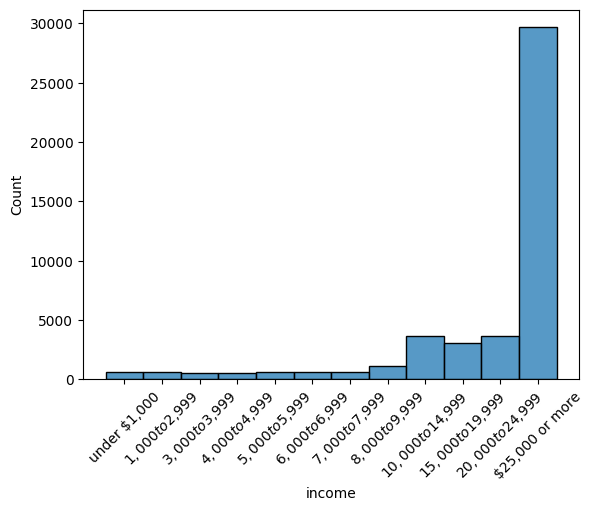

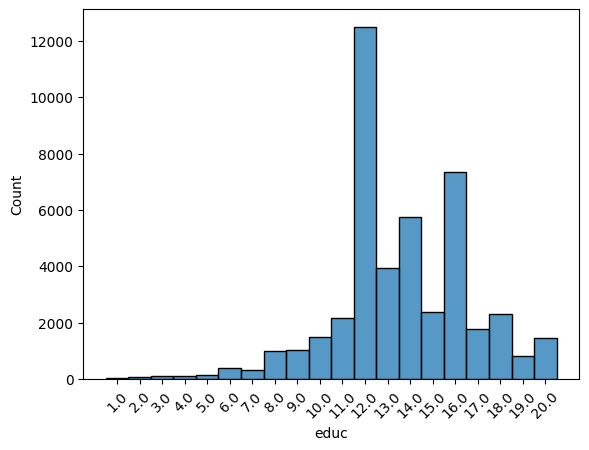

<function matplotlib.pyplot.show(close=None, block=None)>

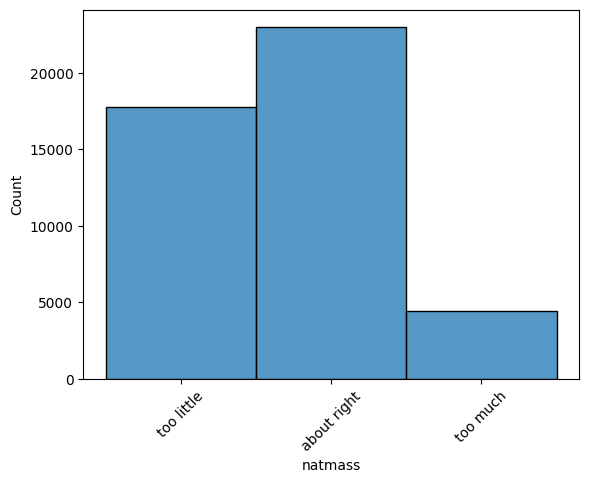

In [66]:
### income histogram ###
df1_cleaned['income']= pd.Categorical(df1_cleaned['income'],
              ['under $1,000',
                '$1,000 to $2,999',
                '$3,000 to $3,999',
                '$4,000 to $4,999',
                '$5,000 to $5,999',
                '$6,000 to $6,999',
                '$7,000 to $7,999',
                '$8,000 to $9,999',
                '$10,000 to $14,999',
                '$15,000 to $19,999',
                '$20,000 to $24,999',
                '$25,000 or more']) # order df1_cleaned by increasing income
sns.histplot(df1_cleaned['income']) # create histogram with x as income
plt.xticks(rotation=45) # tilt x axis values
plt.show()

### educ histogram ###
sns.histplot(df1_cleaned['educ']) # create histogram with x as educ
df1_cleaned['educ']= pd.Categorical(df1_cleaned['educ'],
                  ['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0',
                   '10.0','11.0','12.0','13.0','14.0','15.0','16.0','17.0',
                   '18.0','19.0','20.0']) # order df1 by increasing education level
plt.xticks(rotation=45) # tilt x axis values
plt.show()

### natmass histogram ###
sns.histplot(df1_cleaned['natmass']) # create histogram with x as natmass
df1_cleaned['natmass']= pd.Categorical(df1_cleaned['natmass'],
                  ['too little', 'about right', 'too much']) # order df1 by increasing education level
plt.xticks(rotation=45) # tilt x axis values
plt.show

Family income vs opinion on mass transport


Text(0.5, 1.0, 'Family income vs opinion on mass transportation financial support')

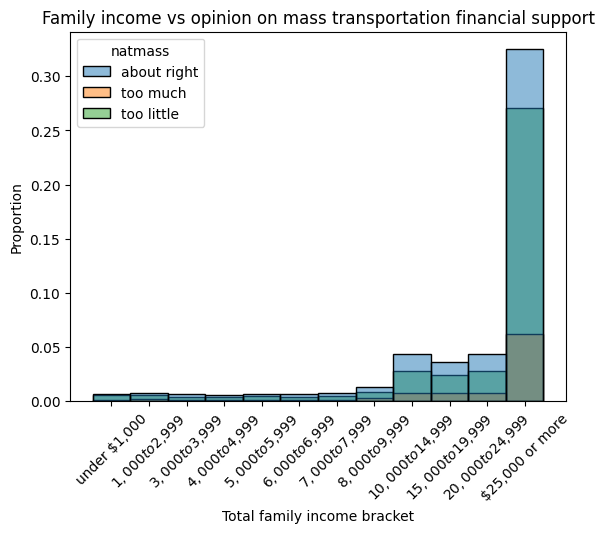

In [53]:
df1_cleaned['income']= pd.Categorical(df1_cleaned['income'],
              ['under $1,000',
                '$1,000 to $2,999',
                '$3,000 to $3,999',
                '$4,000 to $4,999',
                '$5,000 to $5,999',
                '$6,000 to $6,999',
                '$7,000 to $7,999',
                '$8,000 to $9,999',
                '$10,000 to $14,999',
                '$15,000 to $19,999',
                '$20,000 to $24,999',
                '$25,000 or more']) # order df1_cleaned by increasing income

sns.histplot(data=df1_cleaned, x='income',
             hue = 'natmass',
             stat='proportion') # create grouped histogram with x as income and hue as natmass
plt.xticks(rotation=45) # rotate x axis values
plt.xlabel("Total family income bracket") # name x axis label
plt.ylabel("Proportion") # name y axis label
plt.title("Family income vs opinion on mass transportation financial support")

Education level vs opinion on mass transport


Text(0.5, 1.0, 'Education level vs opinion on mass transportation financial support')

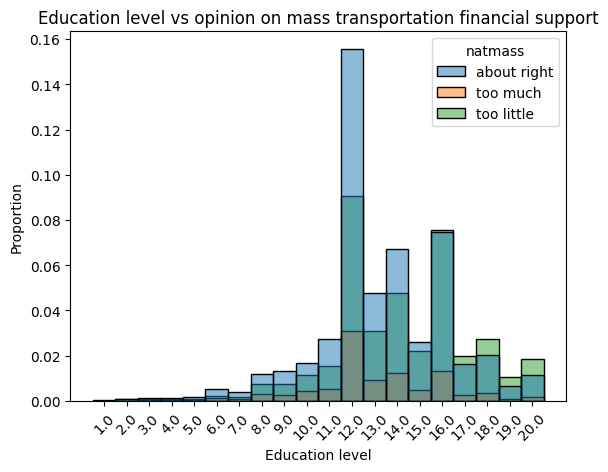

In [51]:
df1_cleaned['educ']= pd.Categorical(df1_cleaned['educ'],
                  ['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','11.0','12.0','13.0','14.0','15.0','16.0','17.0','18.0','19.0','20.0']) # order df1 by increasing education level
sns.histplot(data=df1_cleaned, x='educ', hue = 'natmass', stat='proportion') # create histogram with x as educ and hue as natmass
plt.xticks(rotation=45) # rotate x axis values
plt.xlabel("Education level") # name x axis label
plt.ylabel("Proportion") # name y axis label
plt.title("Education level vs opinion on mass transportation financial support")


Family income vs education level


Text(0.5, 1.0, 'Education level vs family income')

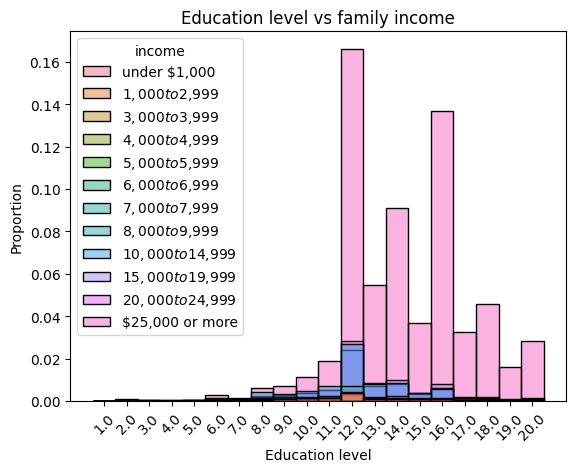

In [54]:
sns.histplot(data=df1_cleaned, x='educ', hue = 'income', stat='proportion') # create grouped histogram with x as educ and hue as income
plt.xticks(rotation=45) # rotate x axis values
plt.xlabel("Education level") # name x axis label
plt.ylabel("Proportion") # name y axis label
plt.title("Education level vs family income")

Compare all three variables

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0')])

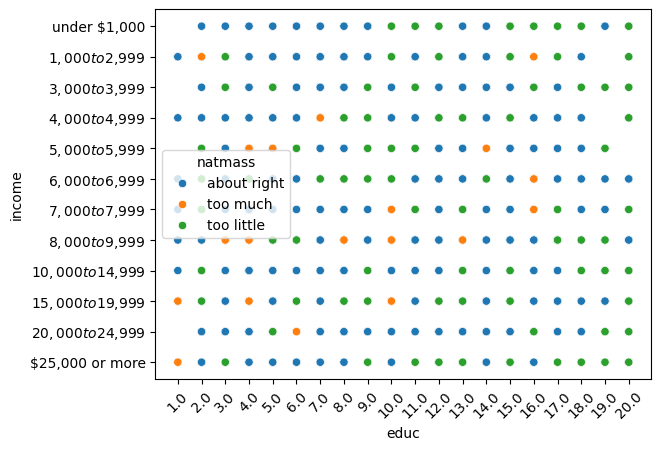

In [55]:
sns.scatterplot(data=df1_cleaned,x='educ',y='income', hue='natmass') # create scatterplot comparing all three values with hue as natmass
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0')])

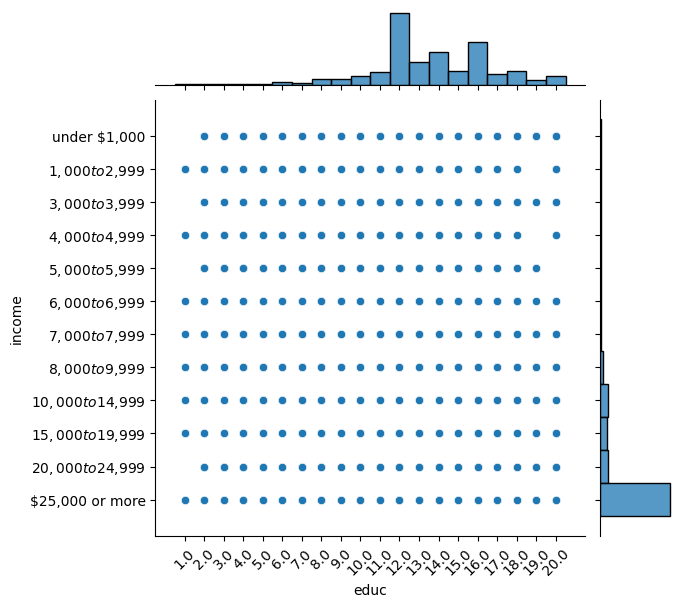

In [56]:
sns.jointplot(data=df1_cleaned,x='educ',y='income') # create jointplot with x as educ and y as income
plt.xticks(rotation=45)